In [65]:
import pandas as pd

# Replace 'your_file.csv' with the actual file path or URL of your CSV file
file_path = 'C:/Users/m5940/Documents/mode_adapt_out.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, nrows=200)

# Display the first few rows of the DataFrame


In [66]:
df.head()

,seq_id,delta_x,delta_y,delta_angle,out_root_pos_x_6,out_root_pos_y_6,out_root_fwd_x_6,out_root_fwd_y_6,out_root_vel_x_6,out_root_vel_y_6,...,out_jpos_x_EndSite_LeftToe,out_jpos_y_EndSite_LeftToe,out_jpos_z_EndSite_LeftToe,out_jrot_x_EndSite_LeftToe,out_jrot_y_EndSite_LeftToe,out_jrot_z_EndSite_LeftToe,out_jrot_W_EndSite_LeftToe,out_jvel_x_EndSite_LeftToe,out_jvel_y_EndSite_LeftToe,out_jvel_z_EndSite_LeftToe
0,1,0.182328,-0.090687,-0.004658,0,0,0.000000e+00,1,0.111737,-0.046549,...,30.7658,-95.5678,-11.8619,0.120479,-0.971663,-0.006852,0.203245,0,0,0
1,1,0.198833,-0.077980,-0.004721,0,0,-1.788140e-07,1,0.121522,-0.039729,...,30.9181,-95.3418,-11.7049,0.124574,-0.971773,-0.011831,0.199995,0,0,0
2,1,0.204689,-0.069632,-0.004085,0,0,0.000000e+00,1,0.125002,-0.035149,...,31.0399,-95.0751,-11.5686,0.130681,-0.971682,-0.017198,0.196115,0,0,0
3,1,0.208296,-0.062843,-0.003069,0,0,0.000000e+00,1,0.127187,-0.031290,...,31.1480,-94.7998,-11.6219,0.136798,-0.972266,-0.022266,0.188387,0,0,0
4,1,0.213895,-0.054721,-0.002466,0,0,-1.192090e-07,1,0.130475,-0.026815,...,31.2479,-94.5036,-11.8924,0.144003,-0.973537,-0.027105,0.175371,0,0,0


In [67]:
import plotly.express as px
import plotly.graph_objects as go


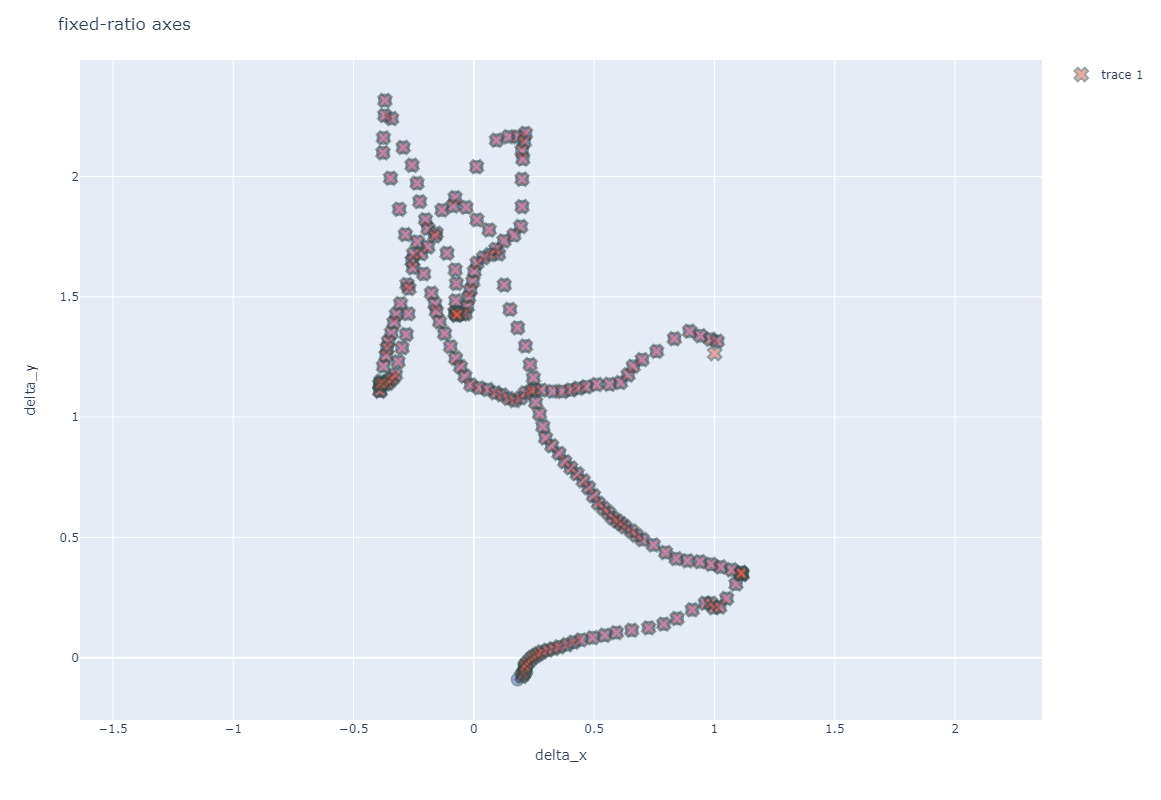

In [68]:
fig = px.scatter(df, x="delta_x", y="delta_y")

fig.add_scatter(x=df['out_root_pos_x_7'], y=df['out_root_pos_y_7'], mode="markers", marker_symbol="x")
#fig.add_scatter(x=df['out_root_pos_x_8'], y=df['out_root_pos_y_8'], mode="markers")
#fig.add_scatter(x=df['out_root_pos_x_9'], y=df['out_root_pos_y_9'], mode="markers")
#fig.add_scatter(x=df['out_root_pos_x_10'], y=df['out_root_pos_y_10'], mode="markers")
#fig.add_scatter(x=df['out_root_pos_x_11'], y=df['out_root_pos_y_11'], mode="markers")

#fig.update_traces(
#    marker=dict(size=3),
#    selector=dict(mode="markers"),
#)
fig.update_traces(marker=dict(size=12,
                              opacity=0.5,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(
    width = 800,
    height = 800,
    title = "fixed-ratio axes"
)
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )

fig.show()

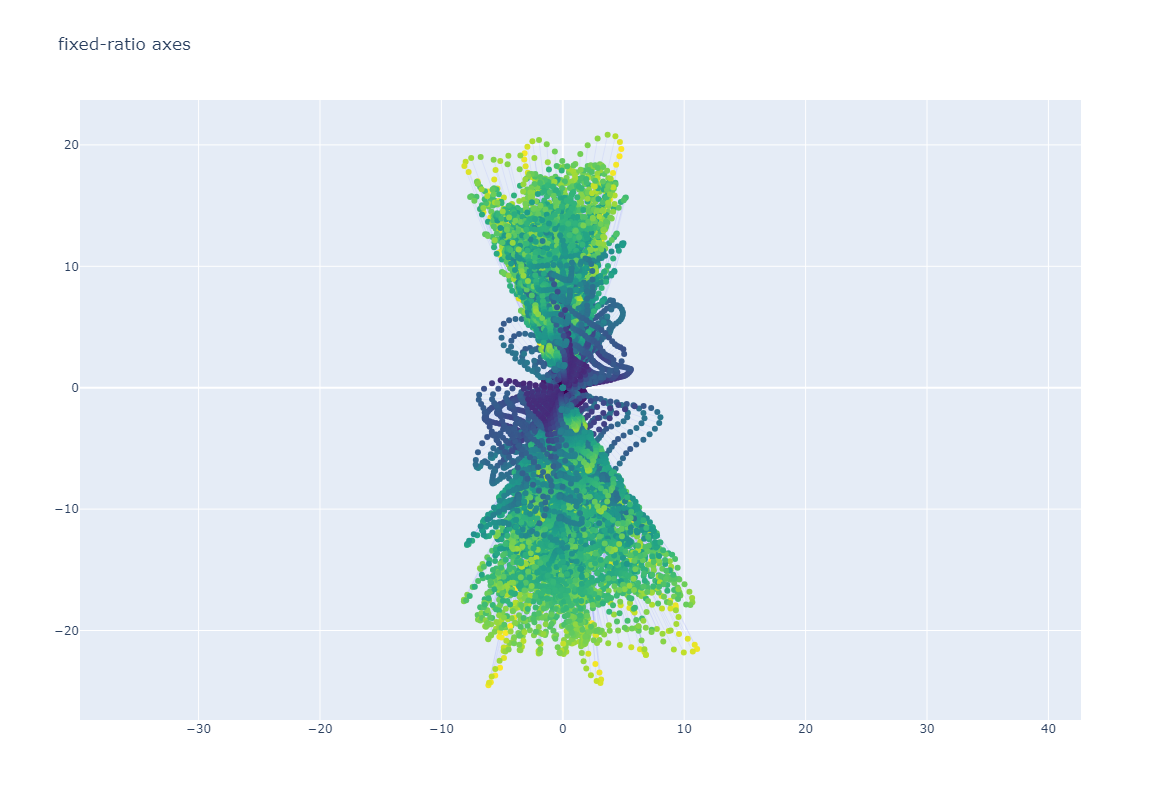

In [11]:
red_x = []
red_y = []
c = []
fig = go.Figure()
for idx, row in df.iterrows():
    _x = [row["root_pos_x_0"],
          row["root_pos_x_1"],
          row["root_pos_x_2"],
          row["root_pos_x_3"],
          row["root_pos_x_4"],
          row["root_pos_x_5"],
          row["root_pos_x_6"],
          row["root_pos_x_7"],
          row["root_pos_x_8"],
          row["root_pos_x_9"],
          row["root_pos_x_10"],
          row["root_pos_x_11"]
         ]
    _y = [row["root_pos_y_0"],
          row["root_pos_y_1"],
          row["root_pos_y_2"],
          row["root_pos_y_3"],
          row["root_pos_y_4"],
          row["root_pos_y_5"],
          row["root_pos_y_6"],
          row["root_pos_y_7"],
          row["root_pos_y_8"],
          row["root_pos_y_9"],
          row["root_pos_y_10"],
          row["root_pos_y_11"]
         ]
    
    
    [red_x.append(x) for x in _x]
    [red_y.append(y) for y in _y]
    [c.append(row["root_speed_5"]) for y in _y]
    
    red_x.append(None) # to separate lines, or they will be connected
    red_y.append(None) # for each adjacent row
    c.append(0)
    
    
fig.add_trace(
    go.Scatter(
        x=red_x,
        y=red_y,
        line=dict(
            width=0.1),
        marker=dict(
             color=c, #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        ),
        mode="lines+markers",

    )
)

fig.update_layout(
    width = 800,
    height = 800,
    title = "fixed-ratio axes"
)
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )


In [31]:
df_row = df.iloc[1000]
df_row

seq_id                     2.000000
root_pos_x_0               1.605500
root_pos_y_0             -15.626400
root_fwd_x_0               0.041847
root_fwd_y_0               0.999072
                            ...    
jrot_z_EndSite_LeftToe     0.203924
jrot_W_EndSite_LeftToe     0.880618
jvel_x_EndSite_LeftToe     0.029923
jvel_y_EndSite_LeftToe     1.584410
jvel_z_EndSite_LeftToe     3.472810
Name: 1000, Length: 365, dtype: float64

In [32]:
pos_x = [df_row[f"root_pos_x_{i}"]  for i in range(12)]
pos_y = [df_row[f"root_pos_y_{i}"] for i in range(12)]

vel_x = [df_row[f"root_vel_x_{i}"] for i in range(12)]
vel_y = [df_row[f"root_vel_y_{i}"] for i in range(12)]

fwd_x = [df_row[f"root_fwd_x_{i}"] for i in range(12)]
fwd_y = [df_row[f"root_fwd_y_{i}"] for i in range(12)]

plt_velo_x = []
plt_velo_y = []

plt_fwd_x = []
plt_fwd_y = []

#Generate Velocity Indicator
for i in range(12):
    plt_velo_x.append(pos_x[i])
    plt_velo_y.append(pos_y[i])
    plt_fwd_x.append(pos_x[i])
    plt_fwd_y.append(pos_y[i])
    
    plt_velo_x.append(pos_x[i]+vel_x[i])
    plt_velo_y.append(pos_y[i]+vel_y[i])

    plt_fwd_x.append(pos_x[i]+fwd_x[i])
    plt_fwd_y.append(pos_y[i]+fwd_y[i])

    plt_velo_x.append(None)
    plt_velo_y.append(None)
    plt_fwd_x.append(None)
    plt_fwd_y.append(None)



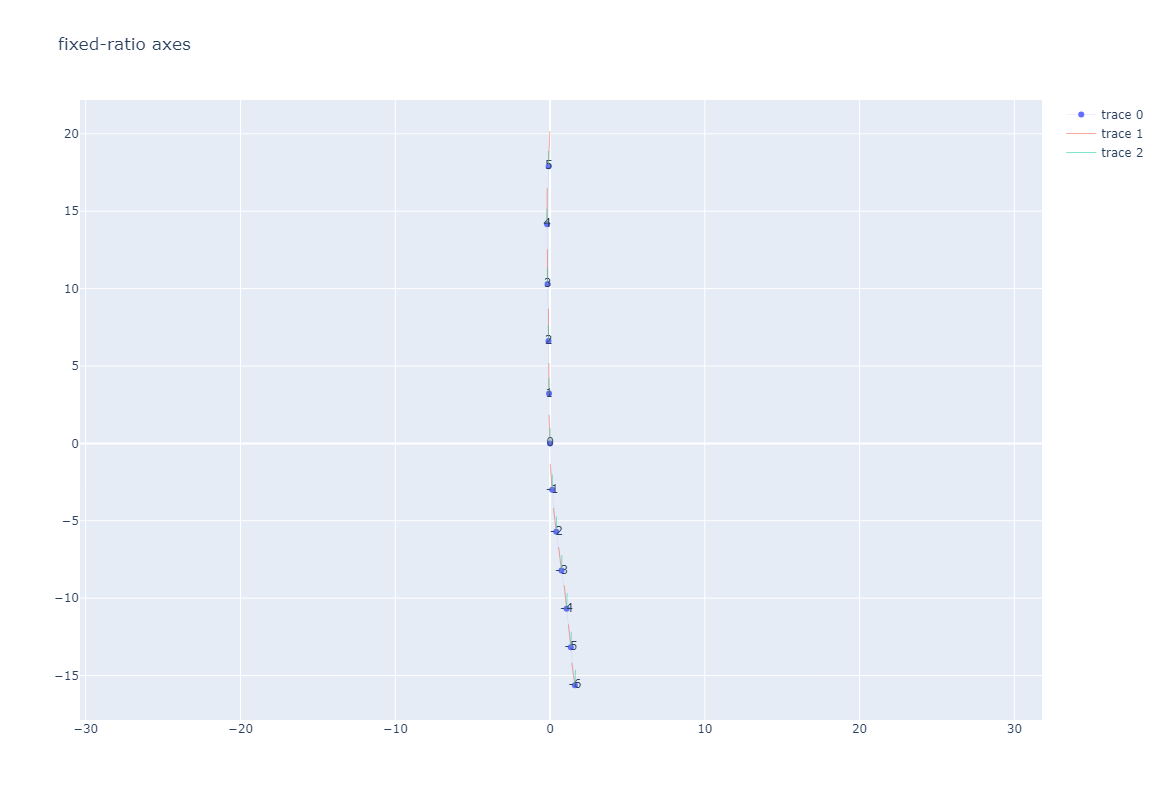

In [33]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=pos_x,
        y=pos_y,
        text=[i-6 for i in range(12)],
        line=dict(
            width=0.1),
        mode="lines+markers+text",

    )
)

fig.add_trace(
    go.Scatter(
        x=plt_velo_x,
        y=plt_velo_y,
        line=dict(
            width=0.5),
        mode="lines",

    )
)

fig.add_trace(
    go.Scatter(
        x=plt_fwd_x,
        y=plt_fwd_y,
        line=dict(
            width=0.5),
        mode="lines",

    )
)

fig.update_layout(
    width = 800,
    height = 800,
    title = "fixed-ratio axes"
)
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
